## 3.1 Build VWAP From a Text File

**value weighted average price**

To bring it all together, let's calculate the volume weighted average price (VWAP) for our price data. Once you understand this, you are not so far from building your own backtests. For the VWAP calculation we need the daily close prices and the volumes. We need to re-open the file, so we can start again from the first value.

Secondly, for a VWAP we need a lookback period for which we can calculate the average. Let's use a 20-day window. In order to store the values we can write them to a list and then do some calculations with that list. Writing values to a list is easy. First, we need to initialize the list:

In [1]:
#initalising lists
close_prices=[]
volumes=[]

In [2]:
#opening files which I made in the previous chapter.
fid = open('./writings/output.csv')
fid.readline()
for i in fid:
    line = i.strip().split(',')
    close = float(line[1])
    volume = float(line[5])
    close_prices.append(close)
    volumes.append(volume)

### Numpy
It allows us to do a wide range of calculations with lists and arrays. In order to avoid having to type the word numpy every time, by convention we import it as **np** like this:

In [3]:
import numpy as np

In [8]:
np.multiply(close_prices,volumes) 
#by putting two lists as parameter, it can multiply one element from a list by the other element in the other array in a matched position.


array([2.48980045e+03, 2.71470930e+03, 3.00643253e+03, ...,
       6.95712471e+06, 6.94250934e+06, 6.77811652e+06])

We can see that this operation returns something that is called ***array***. An array is a data type similar to a ***list*** but has some important differences:
- In a list each element can be stored anywhere in memory and has a pointer to the previous and the next element.
- To access a element in a list one has to start with the first element and travese the whole list until the right element is found.
- **In an array each element is stored next to each other. Each element can be accessed directly without traversing**.
- **Arrays are smaller in size and much faster to access**.
- **With lists it is much easier to append and insert data, which is very inefficient with arrays**.
- List and arrays can be converted into each other.

Right now, we don't need to worry to much what we should use, just be aware of the differences between the two.

With this we can now build our VWAP calculation:

In [9]:
# sum of daily_volume x price divided by total volume
np.sum(np.multiply(close_prices[:20],volumes[:20]))/np.sum(volumes[:20])

52.22150392543676

## 3.2 Pandas for financial data

The Pandas package is probably the biggest reason why Python is so popular in finance. It provides a set of tools that makes it much easier to build quantitative analysis models. We already used some Pandas function above and now we dive into it much deeper. 

Pandas is similar to a database application like MySql but with many convenient functions on top of it. Its **most important structure is a data frame**, which is effectively a table with dated rows and different columns, just like what we've seen previously. Pandas sits on top on Numpy and most of the numpy mathematical functions can be used with Pandas, with the advantage that we now have dates along with our normal indices.

Let's start again by reading our file into a Pandas data frame. 

In [11]:
import pandas as pd

In [14]:
data = pd.read_csv('./writings/output.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
5,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
6,2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307
7,2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498
8,2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252
9,2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181687


In [45]:
data = pd.read_csv('./writings/output.csv',index_col=0,parse_dates=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2021-07-13,2617.629883,2640.840088,2612.739990,2619.889893,2619.889893,830900
2021-07-14,2638.030029,2659.919922,2637.959961,2641.649902,2641.649902,895600
2021-07-15,2650.000000,2651.899902,2611.959961,2625.330078,2625.330078,829300


In [70]:
#selecting multiple columns
data[['High','Low']] 

,High,Low
Date,,
2004-08-19,51.835709,47.800831
2004-08-20,54.336334,50.062355
2004-08-23,56.528118,54.321388
2004-08-24,55.591629,51.591621
2004-08-25,53.798351,51.746044
...,...,...
2021-07-13,2640.840088,2612.739990
2021-07-14,2659.919922,2637.959961
2021-07-15,2651.899902,2611.959961


In [90]:
#sellecting rows that match condition
data[data['Volume']>1000000]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1405500
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300


In [91]:
#multiple condition
data[(data['High']>55) & (data['Low']>55)]  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-16,55.960247,57.683788,55.616535,56.772205,56.772205,9310367
2004-09-17,56.996365,58.525631,56.562988,58.525631,58.525631,9517541
2004-09-20,58.256641,60.572960,58.166977,59.457142,59.457142,10679279
2004-09-21,59.681301,59.985161,58.535595,58.699978,58.699978,7263122
2004-09-22,58.480801,59.611561,58.186901,58.968971,58.968971,7617245
...,...,...,...,...,...,...
2021-07-13,2617.629883,2640.840088,2612.739990,2619.889893,2619.889893,830900
2021-07-14,2638.030029,2659.919922,2637.959961,2641.649902,2641.649902,895600
2021-07-15,2650.000000,2651.899902,2611.959961,2625.330078,2625.330078,829300


In [92]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4.258000e+03
mean,603.782882,609.640639,597.999125,603.997800,603.997800,6.599145e+06
std,498.841652,503.825449,494.692676,499.527204,499.527204,7.858041e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.922000e+03
25%,243.598183,246.117496,240.407642,243.352852,243.352852,1.621050e+06
50%,380.561050,384.576004,378.057938,381.958328,381.958328,3.922046e+06
75%,871.449982,875.300018,866.513489,872.157486,872.157486,8.359868e+06
max,2650.000000,2659.919922,2637.959961,2641.649902,2641.649902,8.254163e+07


####

####

### Visualition 

In [95]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

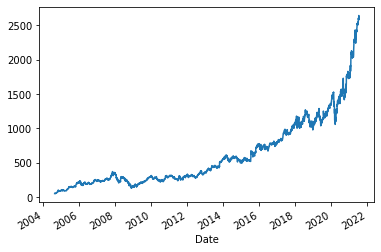

In [99]:
#Plotting a single column
data['Close'].plot()  #As date is index, it's placed on the horizontal axis
plt.show

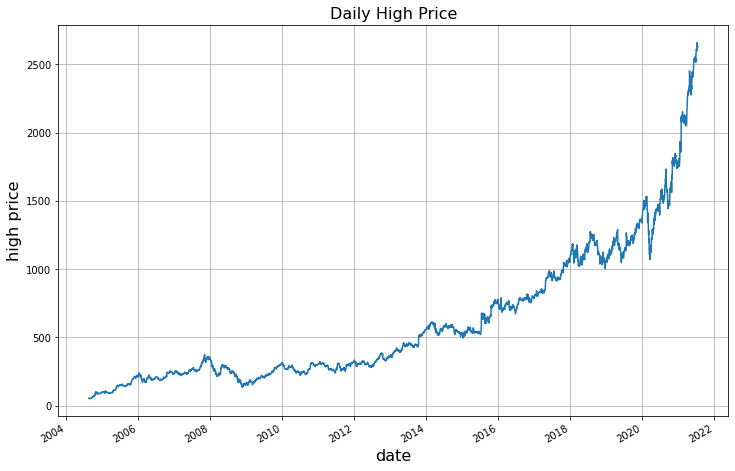

In [119]:
#setting the figure size
plt.figure(figsize=(12,8))
data['High'].plot()


# Setting the x, y labels and title
plt.xlabel("date",fontsize=16)
plt.ylabel("high price",fontsize=16)
plt.title("Daily High Price",fontsize=16)

#add grid
plt.grid()
plt.show()
plt.close()

<Figure size 720x1440 with 0 Axes>

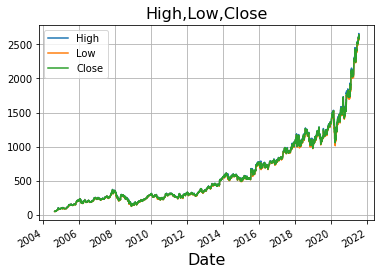

In [123]:
#Set Figure
plt.figure(figsize=(10,20))
data[["High",'Low','Close']].plot()

#Set labeling
plt.xlabel('Date',fontsize=16)
plt.title("High,Low,Close",fontsize=16)

#add
plt.grid()
plt.show()